 # Kaggle Competition: EDSA Apple Prices Challenge

In this notebook we will be focusing on regression algorithms whith an aim to accurately predict the price of a kilogram of Golden Delicious Apples given certain parameters. We going to strive to provide an accurate and robust solution to help the Fresh Produce Industry minimize food waste at the same time making sure they do not run out of stock when customers want to buy more. Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

Authors: Mathew van Wyk, Rinkie Sekgobela, Tiyani Baloyi, Thato kgoale, Noxolo Ngcobo

## Import libraries

In [1]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random
import pickle
# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import zscore
from scipy.stats import stats

# Misc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn import metrics

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
%matplotlib inline

## We will load our data as a Pandas DataFrame

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")
df_test = pd.read_csv('https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-test_set.csv')

## First view the data Sets.

In [3]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


### Shape of the data


In [5]:
df_train.shape, df_test.shape  

((64376, 13), (685, 13))

### Check for null values

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


### Descriptive statistics summary

In [8]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [9]:
df_test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


## Filter important features

In [10]:
df_train = df_train[df_train['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]
df_test = df_test[df_test['Commodities'].str.contains('APPLE GOLDEN DELICIOUS')]

In [11]:
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [12]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


## Analysis of the target variable

In [13]:
#summary of avg_price_per_kg
df_train['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

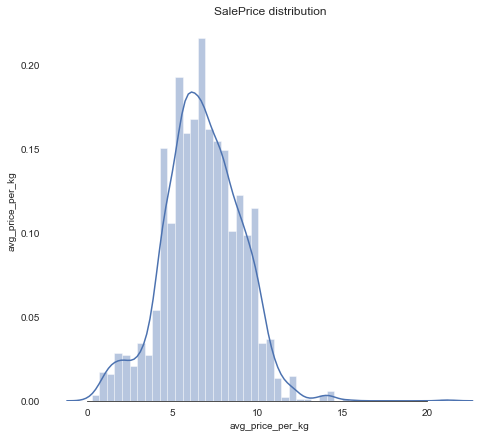

In [14]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(df_train['avg_price_per_kg'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="avg_price_per_kg")
ax.set(xlabel="avg_price_per_kg")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [15]:
#skewness and kurtosis
print("Skewness: %f" % df_train['avg_price_per_kg'].skew())
print("Kurtosis: %f" % df_train['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


The avg_price_per_kg is Fairly Symmetrical. The Kurtosis is low < 3 therefore means there is lack of outliers with this variable.


## Relationship of avg_price_per_kg with numerical variables 

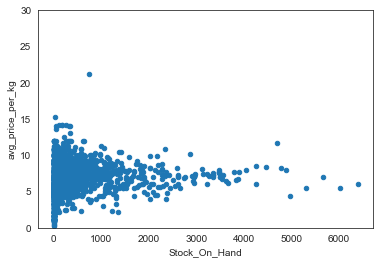

In [16]:
#scatter plot Stock_On_Hand/avg_price_per_kg
var = 'Stock_On_Hand'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

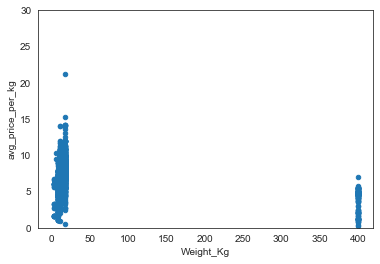

In [17]:
#scatter Weight_Kg/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

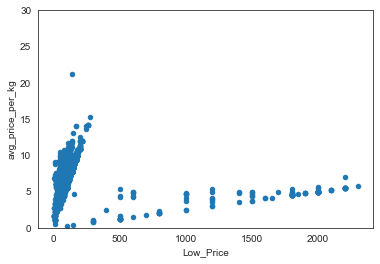

In [18]:
#scatter plot Low_Price/avg_price_per_kg
var = 'Low_Price'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

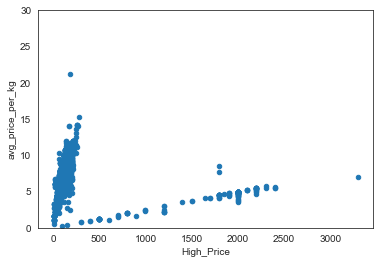

In [19]:
#scatter plot High_Price/avg_price_per_kg
var = 'High_Price'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

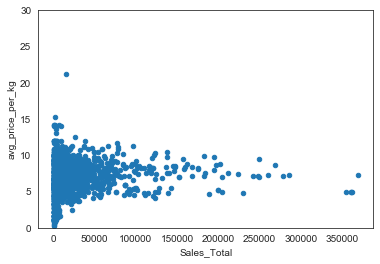

In [20]:
#scatter plot Sales_Total/avg_price_per_kg
var = 'Sales_Total'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

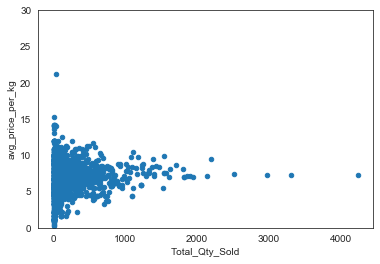

In [21]:
#scatter plot Total_Qty_Sold/avg_price_per_kg
var = 'Total_Qty_Sold'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

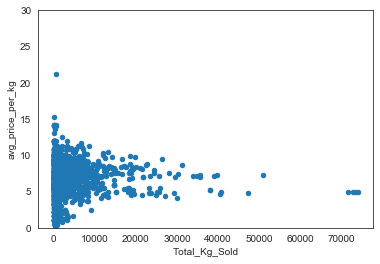

In [22]:
#scatter plot Total_Kg_Sold/avg_price_per_kg
var = 'Total_Kg_Sold'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

## Relationship of avg_price_per_kg with categorical features

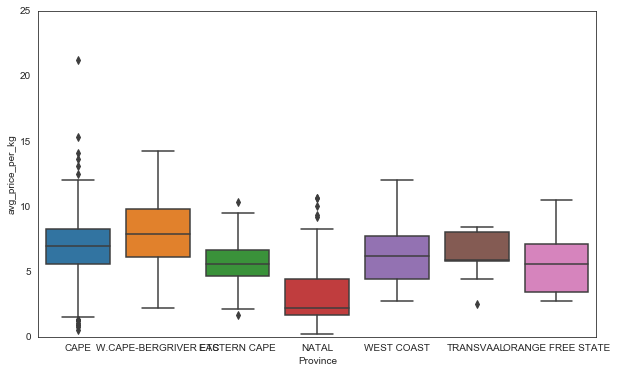

In [23]:
#box plot Province/avg_price_per_kg
var = 'Province'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

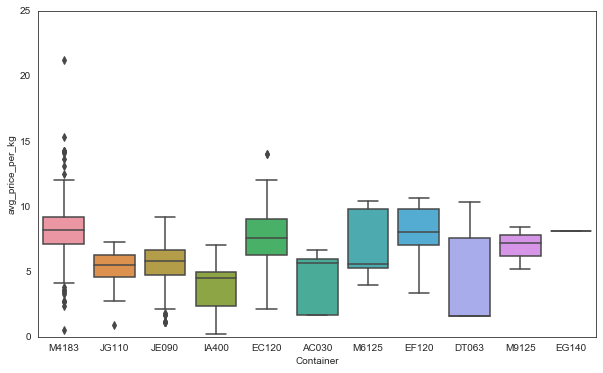

In [24]:
#box plot container/avg_price_per_kg
var = 'Container'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

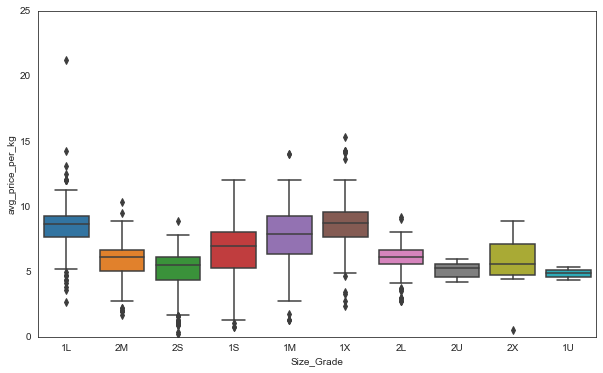

In [25]:
#box plot Size_Grade/avg_price_per_kg
var = 'Size_Grade'
data = pd.concat([df_train['avg_price_per_kg'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

## Visualizing the data to see the correlation
### Multiple variable analysis

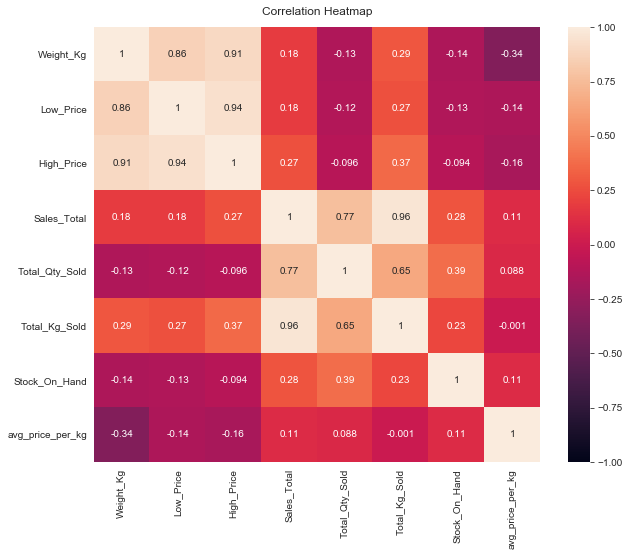

In [26]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

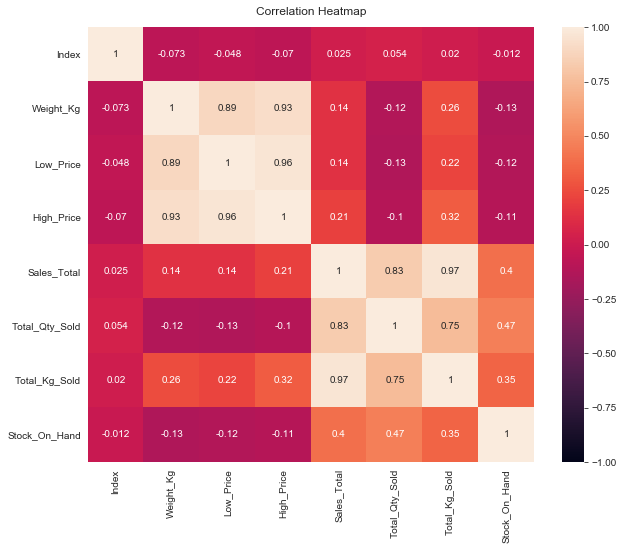

In [27]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**According to the heatmap above**
- Sales_Total, Total_Qty_Sold, and Stock_on_hand have weak positive correlation with avg_price_per_kg.
- Weight_Kg , Low_price, High_price and Total_kg_Sold have weak negative correlation with avg_price_per_kg.

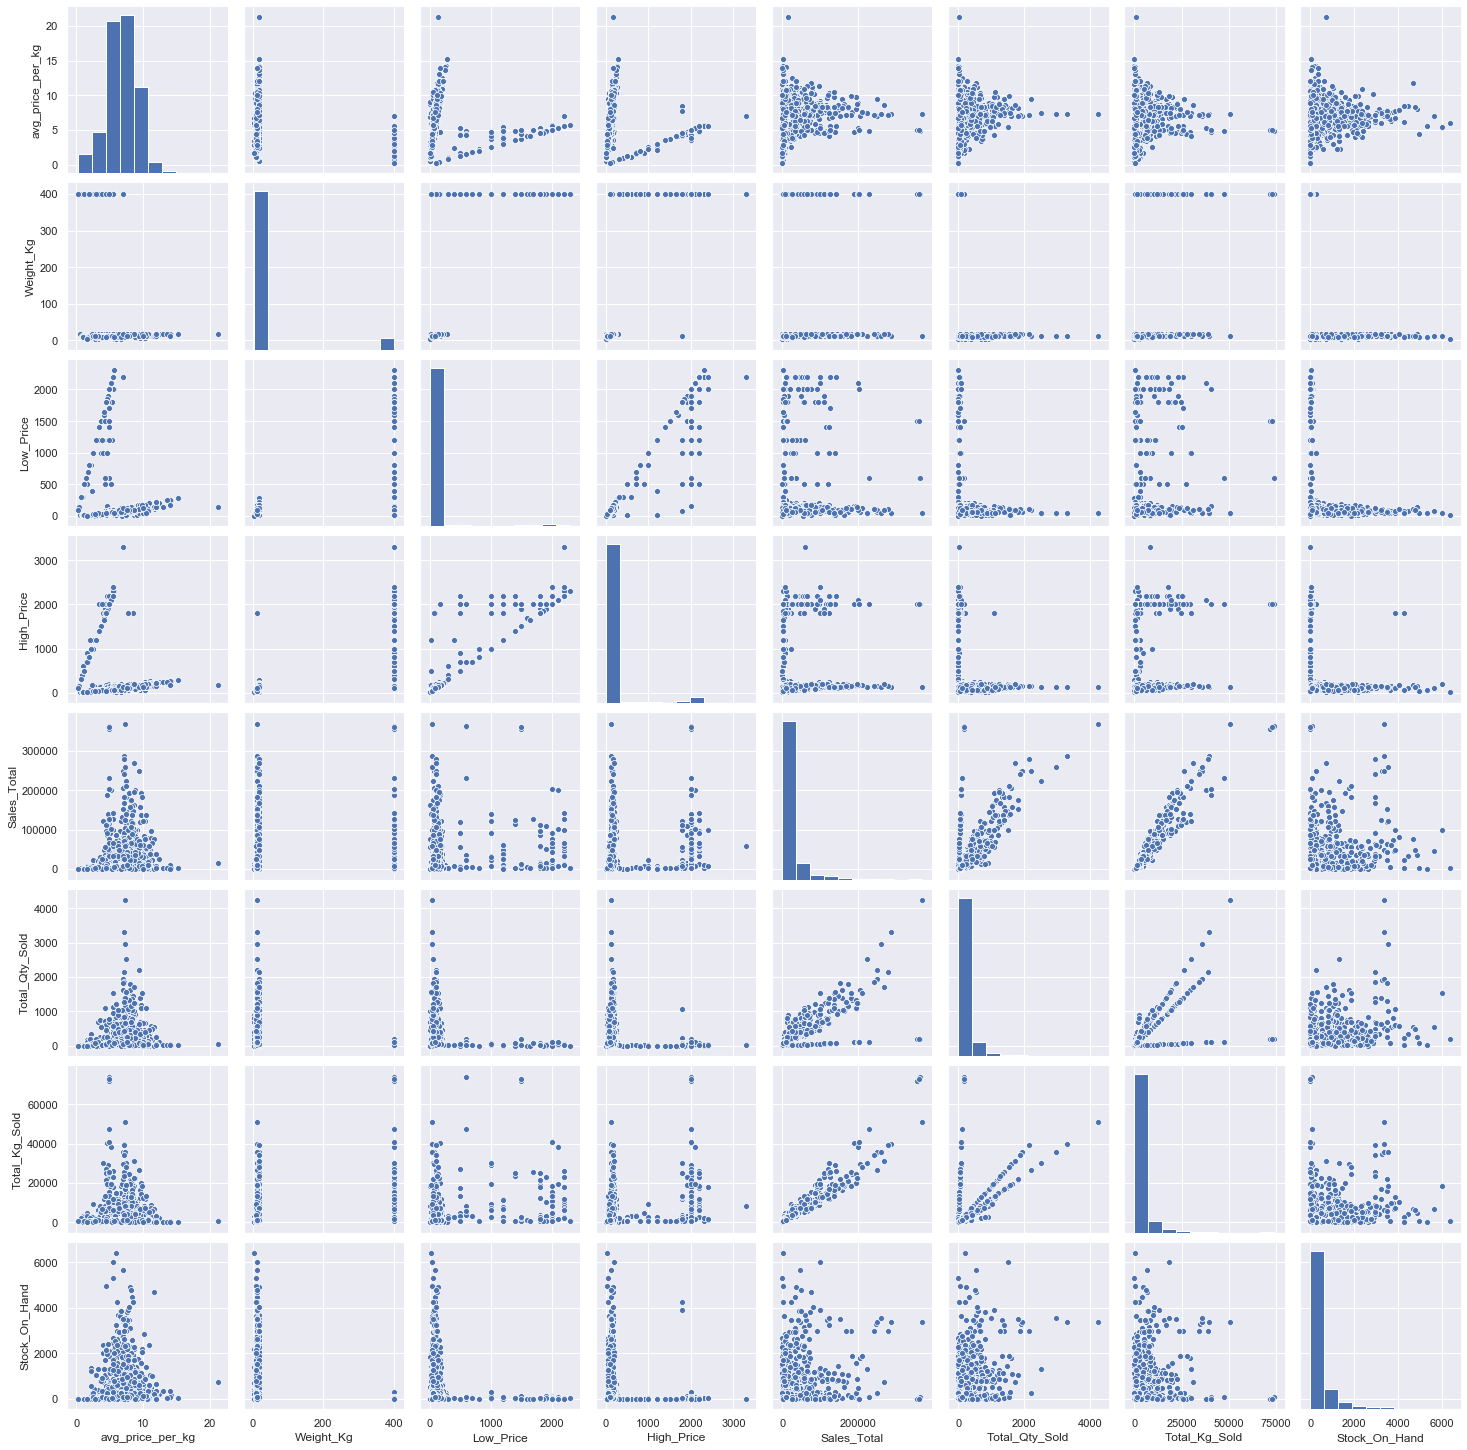

In [28]:
#scatterplot
sns.set()
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand', 'Date']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

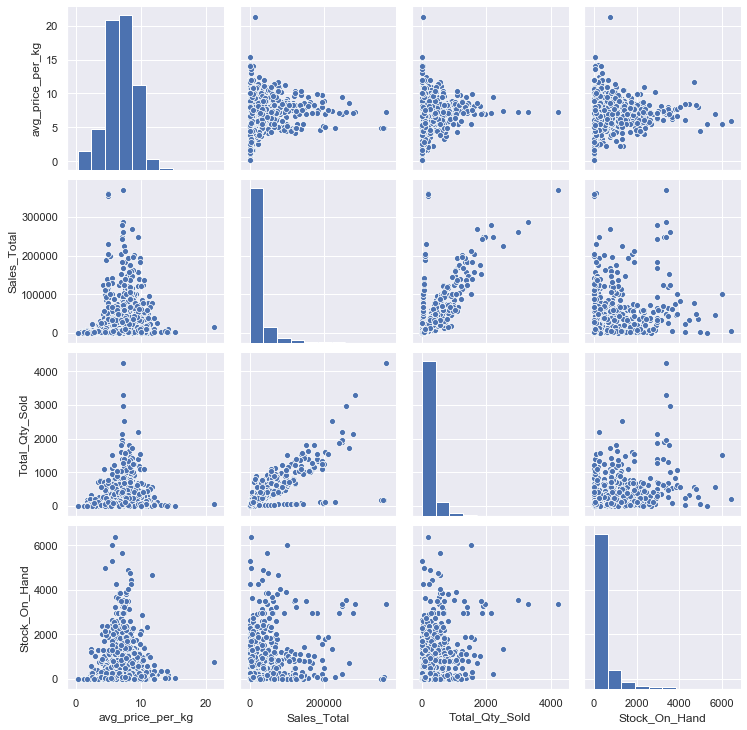

In [29]:
# positive correlation
sns.set()
cols = ['avg_price_per_kg', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand']
sns.pairplot(df_train[cols], height = 2.5)
plt.show();

## Data transformation

In [30]:
Region = LabelEncoder()
Apple_Container = LabelEncoder()
Grade = LabelEncoder()


df_train["Province_n"] = Region.fit_transform(df_train["Province"])
df_train["Container_n"] = Apple_Container.fit_transform(df_train["Container"])
df_train["Size_Grade_n"] = Grade.fit_transform(df_train["Size_Grade"])


df_test["Province_n"] = Region.fit_transform(df_test["Province"])
df_test["Container_n"] = Apple_Container.fit_transform(df_test["Container"])
df_test["Size_Grade_n"] = Grade.fit_transform(df_test["Size_Grade"])



df_train = df_train.drop(["Province", "Container", "Size_Grade","Commodities","Date"], axis = "columns")
df_test = df_test.drop(["Province", "Container", "Size_Grade","Commodities","Date"], axis = "columns")

In [31]:
df_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_n,Container_n,Size_Grade_n
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,8,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,7,6
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,5,6,7
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,8,2
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,5,2


In [32]:
df_test.head()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_n,Container_n,Size_Grade_n
0,1,12.0,128.0,136.0,5008.0,38,456.0,0,5,2,1
1,2,18.3,220.0,220.0,1760.0,8,146.4,2,5,8,4
2,3,12.0,120.0,120.0,720.0,6,72.0,45,5,2,2
3,4,18.3,160.0,160.0,160.0,1,18.3,8,5,8,1
4,5,18.3,140.0,160.0,14140.0,100,1830.0,19,5,8,0


In [33]:
df_train.shape, df_test.shape

((1952, 11), (685, 11))

## Train-Test Split and feature scaling

In [34]:
#define the variables
x = df_train[["Weight_Kg","Low_Price","High_Price","Sales_Total","Total_Qty_Sold",
                "Total_Kg_Sold","Stock_On_Hand","Province_n","Container_n","Size_Grade_n"]]

y = df_train[['avg_price_per_kg']]

In [35]:
#split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 42)

## Model fitting

In [36]:
# Create model object
LR = LinearRegression().fit(X_train, y_train)

In [37]:
X_train = df_train.drop(['avg_price_per_kg'], axis=1)
Y_train = df_train["avg_price_per_kg"]
X_test  = df_test.drop("Index", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1952, 10), (1952,), (685, 10))

In [38]:
RF = RandomForestRegressor(n_estimators=1000, max_depth=10)
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
XGB = XGBRegressor().fit(X_train,Y_train)

## Make predictions

In [40]:
LR_pred = LR.predict(X_test)
LR_pred = np.concatenate(LR_pred) #flatten array
LR_pred

array([ 8.05686452,  7.5411816 ,  7.60825418,  8.25706286,  8.66986484,
        5.15367777,  5.60721902,  8.02433755,  7.13331838,  7.37933602,
        5.94117187,  7.32330114,  6.88621319,  5.29520665,  5.10903793,
        6.50856355,  7.7992374 ,  5.18511825, 10.22579508,  5.51345812,
        5.59030396,  4.95879982,  6.26502632,  6.7879167 ,  6.10055896,
        7.38325243,  7.22137793,  8.90209985,  6.84613068,  8.77556899,
        7.42457103,  5.45684154,  7.60141061,  7.90805115,  3.20742275,
        6.93927754,  8.50065751,  9.85556014,  5.85585489,  7.31977404,
        7.11199784,  8.69145961,  7.08722992,  6.07806128,  6.18055416,
        5.77204053,  5.8823864 ,  5.8021617 ,  6.00019136,  1.74776604,
        1.37366731,  6.0557025 ,  7.20829158,  9.00091955,  7.47003196,
        7.2064638 ,  7.68349125,  9.44847315,  7.56030017,  7.5082751 ,
        7.18636526,  9.89639143,  6.36919629,  8.25678663,  7.87605861,
        5.6853851 ,  6.07755336,  4.95281463,  6.96812654,  8.12

In [41]:
RF_pred = RF.predict(X_test)
RF_pred

array([10.7460352 , 11.90685257, 10.00068756,  8.74498484,  8.2784149 ,
        4.47357667,  3.64389055,  7.21298194,  8.77606302,  9.31304171,
        5.17331813,  5.68153   ,  8.88552248,  4.46701268,  4.50313304,
        6.11122488,  7.08221581,  4.5232014 , 10.61810809,  5.97823719,
        5.50729052,  4.73587478,  5.35381201,  7.8442256 ,  5.56017288,
        6.26252636,  7.63965634,  7.98369141,  7.32209514,  7.09999559,
        7.9833656 ,  5.59563248,  9.92068229,  7.66174377,  4.83109262,
        9.83320845, 10.92270782, 11.44330344,  6.35851961,  6.54025004,
        8.27472373,  8.05670738,  5.02836729,  6.18707441,  5.56017288,
        5.30158418,  4.99913917,  5.56303288,  6.11083977,  5.01273797,
        1.5894    ,  6.23287516,  6.62279516, 14.16848333,  8.41214931,
        5.67399217, 11.95636364,  8.73862512,  7.54292531,  5.98614561,
        7.41156012, 11.32637222,  6.18979426,  9.1505655 ,  6.29770272,
        6.13476945,  6.91915586,  5.17981892,  5.492575  ,  7.04

In [42]:
XGB_pred = XGB.predict(X_test)
XGB_pred

array([10.7127    , 12.213106  , 10.005927  ,  8.683472  ,  8.145393  ,
        4.6155457 ,  3.645412  ,  7.2271276 ,  8.741584  ,  9.4373455 ,
        5.0232544 ,  5.754971  ,  8.680216  ,  4.358358  ,  4.5183797 ,
        6.0612464 ,  7.0982385 ,  4.5277057 , 10.733308  ,  6.3176665 ,
        6.12521   ,  4.8276367 ,  5.790255  ,  7.7697725 ,  5.5477204 ,
        6.3027353 ,  7.5950603 ,  8.102218  ,  7.597903  ,  7.1560235 ,
        7.85438   ,  5.5768566 ,  9.102304  ,  7.6949954 ,  4.843875  ,
        9.94028   , 10.902665  , 11.3631315 ,  6.4467297 ,  6.716469  ,
        8.357286  ,  7.881278  ,  4.984973  ,  6.1892657 ,  5.603555  ,
        5.136966  ,  5.0050697 ,  5.4566517 ,  6.2108607 ,  4.891721  ,
        1.4852339 ,  6.263884  ,  6.363115  , 13.594087  ,  9.027698  ,
        5.5258794 , 11.915675  ,  9.4165    ,  7.869231  ,  5.8870435 ,
        8.478942  , 11.428304  ,  6.0628552 ,  9.225271  ,  5.8609715 ,
        6.2287893 ,  6.785224  ,  4.9552145 ,  5.542816  ,  7.13

## Evaluation of the models

In [43]:
print (f"The prediction accuracy is {round (LR.score(X_train, Y_train)*100,2)}")
print (f"The prediction accuracy is {round (RF.score(X_train, Y_train)*100,2)}")
print (f"The prediction accuracy is {round (XGB.score(X_train, Y_train)*100,2)}")

The prediction accuracy is 47.69
The prediction accuracy is 98.25
The prediction accuracy is 99.92


## Save the model

In [44]:
model_save_path = "LR_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(LR, file)

In [45]:
model_save_path = "RF_model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(RF, file)

In [46]:
model_save_path = "model.plk"

with open(model_save_path, "wb") as file: 
    pickle.dump(XGB, file)

## Save the predictions in a csv file

In [47]:
LR_submission = pd.DataFrame({
        "Index": df_test["Index"],
        "avg_price_per_kg": LR_pred})

LR_submission.to_csv('LR_submission.csv', index=False),

LR_submission.head()

,Index,avg_price_per_kg
0,1,8.056865
1,2,7.541182
2,3,7.608254
3,4,8.257063
4,5,8.669865


In [48]:
RF_submission = pd.DataFrame({
        "Index": df_test["Index"],
        "avg_price_per_kg": RF_pred})

RF_submission.to_csv('RF_submission.csv', index=False),
RF_submission.head()

,Index,avg_price_per_kg
0,1,10.746035
1,2,11.906853
2,3,10.000688
3,4,8.744985
4,5,8.278415


In [49]:
XGB_submission = pd.DataFrame({
        "Index": df_test["Index"],
        "avg_price_per_kg": XGB_pred})

XGB_submission.to_csv('XGB_submission.csv', index=False),

XGB_submission.head()

,Index,avg_price_per_kg
0,1,10.712700
1,2,12.213106
2,3,10.005927
3,4,8.683472
4,5,8.145393


## Conclusion

In this notebook, Decision tree, Random Forest, Linear Regression, and XGBoost algorithms are used in Fresh Produce Industry to predict the price for Golden Delicious Apples. The prediction results of these various machine learning algorithms are not the same. From all the tested models it was evident that the XGBoost model had the best predictions compared to other models with the prediction accuracy of about 99% and a root mean square error of about 0.4 on the data sets that we used. Therefore through these observetions we concluded that XGBoost model gives the best result and it was therefore regarded as the best model in predicting the Golden Delicious Apples cost given the parameters used in this project. 

## Acknowledgement

Thanks to Ali Elimam, who supervised over this team, provided all the support and helpful suggestions throughout the program. It was through him that this work was both entertaining and educational.